In [56]:
import pandas as pd
import seaborn as sns

rental19 = pd.read_csv('data/#5. 공공자전거_이용정보(시간대별)/new_ride_data_2019.csv', encoding='cp949')

In [57]:
rental19 = rental19.rename({'Unnamed: 0': 'time'}, axis=1)
rental19.head()

rental19.age = rental19.age.map({'10대': '10s', '20대': '20s', '30대': '30s', '40대': '40s',
                                 '50대': '50s', '60대': '60s','70대': '70s'}) 

In [58]:
rental19.time = pd.to_datetime(rental19.time)
rental19['hour'] = rental19.time.map(lambda x: x.hour)
rental19['date'] = rental19.time.map(lambda x: x.date())
rental19.head(2)

,time,rental_code,sex,age,usage,calories,carbon,distance,usage_time,location,hour,date
0,2019-01-01,정기권,F,10s,1,41.96,0.38,1630.0,29,458_광화문역 5번출구,0,2019-01-01
1,2019-01-01,정기권,F,20s,1,27.23,0.29,1250.0,7,2159_인헌초교,0,2019-01-01


In [71]:
len(rental19)

14719885

In [72]:
rental19 = rental19[rental19.distance != 0]

In [73]:
len(rental19)

14343794

In [74]:
rental19['mean_distance'] = rental19.distance / rental19.usage

In [75]:
rental19.describe()

,usage,calories,carbon,distance,usage_time,hour,mean_distance
count,1.434379e+07,1.434379e+07,1.434379e+07,1.434379e+07,1.434379e+07,1.434379e+07,1.434379e+07
mean,1.268183e+00,1.736181e+02,1.505231e+00,6.487883e+03,3.207570e+01,1.391068e+01,5.060225e+03
std,7.488358e-01,4.156388e+02,3.536864e+00,1.523677e+04,4.341774e+01,6.365935e+00,1.208454e+04
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.000000e+00,3.520000e+01,3.100000e-01,1.340000e+03,9.000000e+00,9.000000e+00,1.240000e+03
50%,1.000000e+00,6.843000e+01,6.000000e-01,2.570000e+03,1.800000e+01,1.500000e+01,2.230000e+03
75%,1.000000e+00,1.511100e+02,1.320000e+00,5.670000e+03,4.000000e+01,1.900000e+01,4.540000e+03
max,7.200000e+01,4.093233e+04,3.980000e+02,6.140800e+05,1.057100e+04,2.300000e+01,2.559900e+05


In [76]:
rental19 = rental19[rental19.mean_distance <= 50000]

In [77]:
len(rental19)

14146192

In [78]:
date_count = rental19.pivot_table(index='date', values='usage', aggfunc='sum')
date_count = date_count.reset_index()
date_count.date = pd.to_datetime(date_count.date)

In [79]:
temp = pd.read_csv('data/temp_2019.csv', encoding='cp949')
temp.일시 = pd.to_datetime(temp.일시)

In [80]:
df = pd.merge(date_count, temp, left_on='date', right_on='일시', how='left')

In [81]:
def season_mapper(dt):
    if dt.month in [6,7,8]:
        return 'summer'
    elif dt.month in [12,1,2]:
        return 'winter'
    else:
        return 'else'

In [82]:
df['season'] = df.date.map(lambda x: season_mapper(x))

In [83]:
df.head()

,date,usage,지점,지점명,일시,평균기온(°C),season
0,2019-01-01,5335,108,서울,2019-01-01,-5.0,winter
1,2019-01-02,9225,108,서울,2019-01-02,-4.9,winter
2,2019-01-03,10330,108,서울,2019-01-03,-3.5,winter
3,2019-01-04,10876,108,서울,2019-01-04,-1.1,winter
4,2019-01-05,7734,108,서울,2019-01-05,-2.8,winter


In [84]:
df = df.rename({'평균기온(°C)':'temp'}, axis=1)

In [85]:
df.describe()

,usage,지점,temp
count,363.000000,363.0,363.000000
mean,49506.691460,108.0,13.531129
std,31097.857386,0.0,10.171040
min,1181.000000,108.0,-7.900000
25%,19629.500000,108.0,4.300000
50%,51879.000000,108.0,14.600000
75%,75364.500000,108.0,22.950000
max,160396.000000,108.0,31.600000


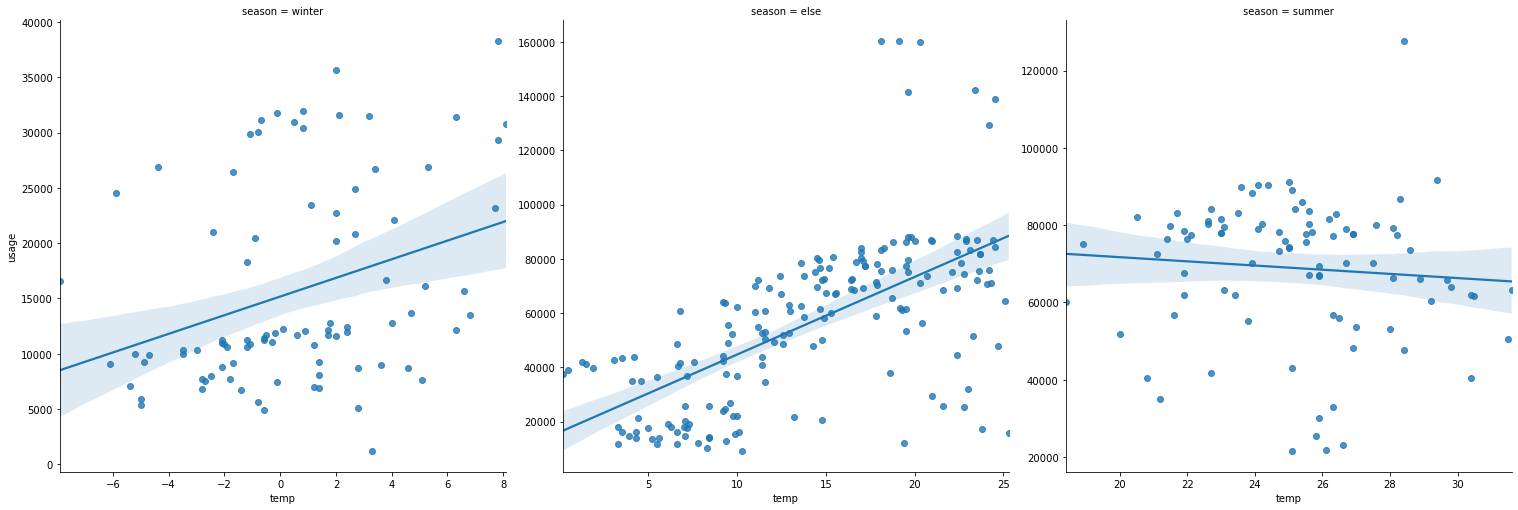

In [92]:
lm = sns.lmplot(x='temp', y='usage', col='season', data=df, 
                sharex=False, sharey=False, height=7, fit_reg=True)
lm.savefig('temp_count.png')